In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os, sys
import numpy as np
from pathlib import Path
import pickle
import matplotlib as mpl

cwd = os.getcwd()
dirLib = cwd + r'/library'
if dirLib not in sys.path:
    sys.path.append(dirLib)

from load_ARSENL_data import load_INPHAMIS_data, set_binwidth

mpl.rcParams.update({"figure.facecolor": "white"})

In [3]:
home = str(Path.home())

load_dir = home + r'\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss'

fname_dead_fit = r'\eval_loss_dtimeTrue_OD1.7E+00-3.4E+00_order7-19_shots1.00E+05_use_final_True_best_fit.csv'
fname_pois_fit = r'\eval_loss_dtimeFalse_OD1.7E+00-3.4E+00_order7-19_shots1.00E+05_use_final_True_best_fit.csv'

fname_ttag = r'\fit_figures\eval_loss_dtimeTrue_OD1.7-3.4_order7-19_ref_shots1.30E+06_lsr_shots1.00E+05_use_final_True_best_fit.pkl'



In [4]:
df_dead_fit = pd.read_csv(load_dir + fname_dead_fit)
df_pois_fit = pd.read_csv(load_dir + fname_pois_fit)

infile_ttag = open(load_dir + fname_ttag, 'rb')
load_ttag = pickle.load(infile_ttag)

In [5]:
OD_lst = []
OD_name_lst = []
for column in df_dead_fit:
    if column[:2] == 'OD':    
        OD_lst.append(float(column[2:]))
        OD_name_lst.append(column)
print('OD values investigated: {}'.format(OD_lst))

OD values investigated: [1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4]


In [34]:
idx = 16

t_fine = df_dead_fit['time vector'].to_numpy()
dead_fit = df_dead_fit[OD_name_lst[idx]]
pois_fit = df_pois_fit[OD_name_lst[idx]]

flight_time = load_ttag[0][idx].to_numpy()
n_shots = load_ttag[5]

In [35]:
t_min = t_fine[0]
t_max = t_fine[-1]
dt = np.diff(t_fine)[0]

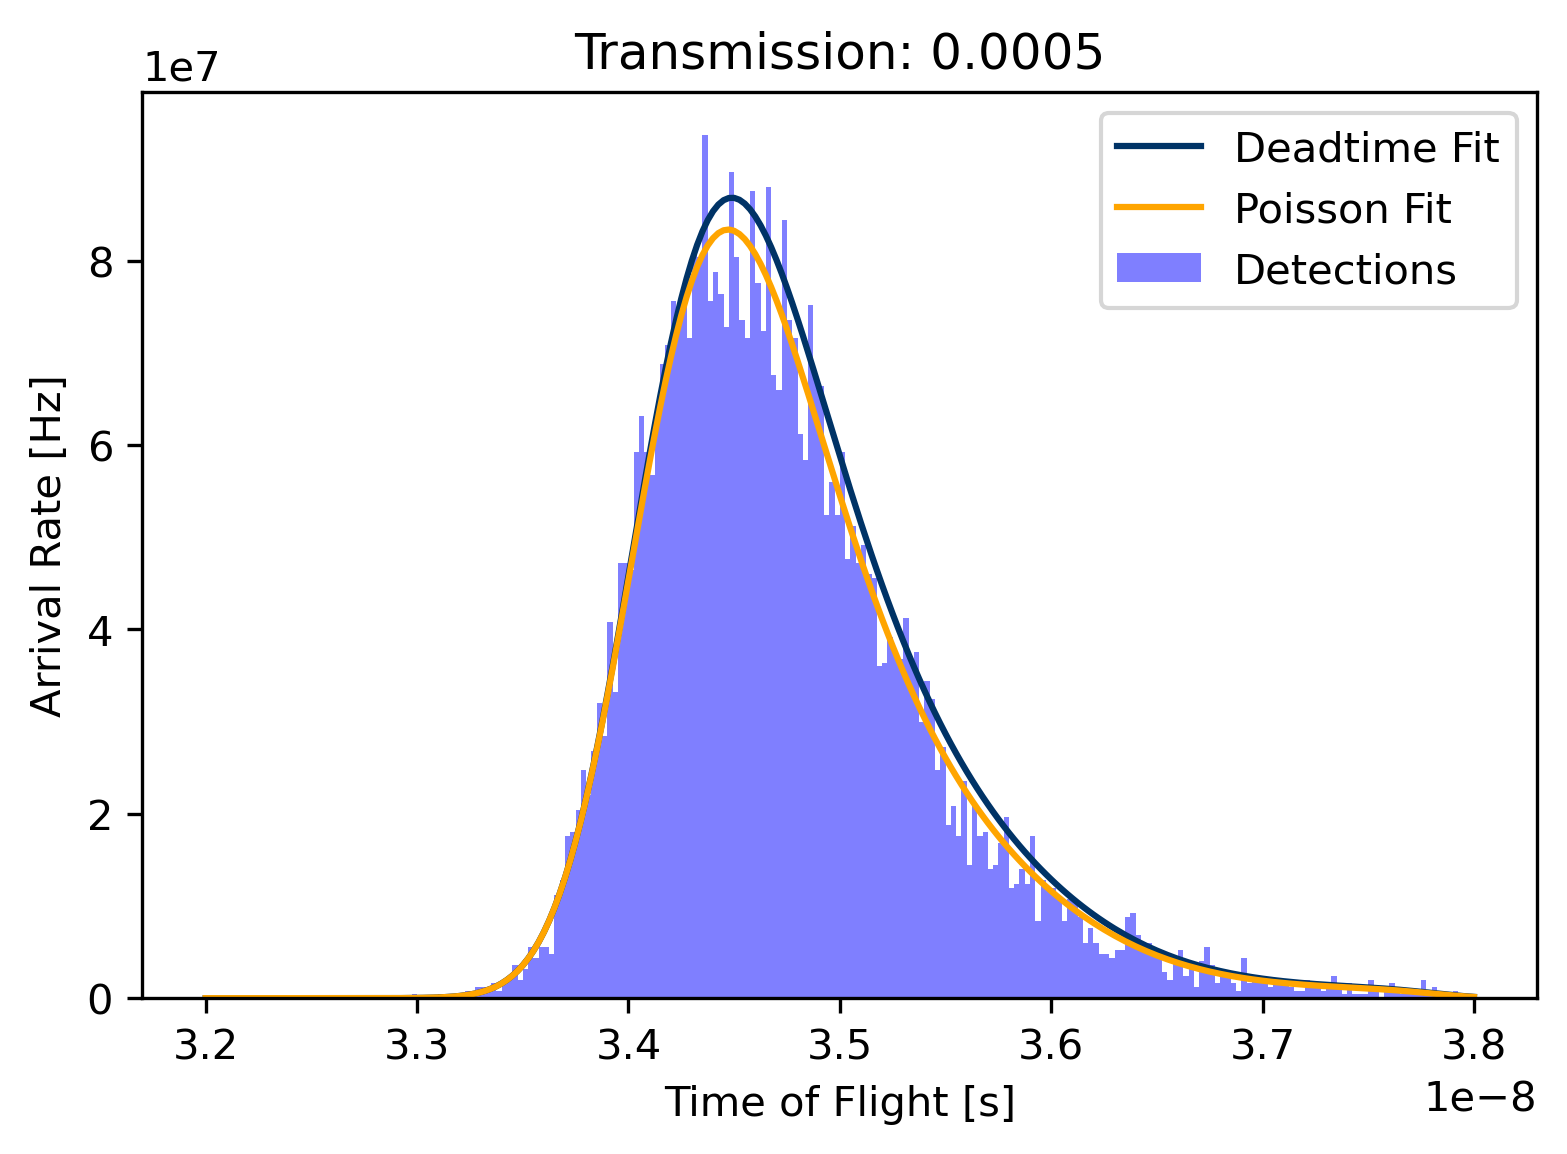

In [36]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(111)
ax.plot(t_fine, dead_fit, label='Deadtime Fit', color='#003366')
ax.plot(t_fine, pois_fit, label='Poisson Fit', color='orange')

bin_array = set_binwidth(t_min, t_max, dt)
n, bins = np.histogram(flight_time, bins=bin_array)
binwidth = np.diff(bins)[0]
N = n / binwidth / n_shots  # [Hz]
center = 0.5 * (bins[:-1] + bins[1:])
ax.bar(center, N, align='center', color='blue', width=binwidth, alpha=0.5, label='Detections')

ax.set_ylabel('Arrival Rate [Hz]')
ax.set_xlabel('Time of Flight [s]')
ax.set_title('Transmission: {:.4f}'.format(10**-float(OD_name_lst[idx][-3:])))
plt.legend()
plt.show()